In [1]:
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
data(package = "nycflights13")

In [5]:
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In [ ]:
colnames(flights)

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

# 1. Which carries have the best on-time performance, and how does this vary by airport (origin)?

necessary: carrier, dep_delay, arr_delay, origin

*Within 15 minutes after its schedule is considered on-time

In [ ]:
flights %>%
  filter(!is.na(dep_delay), !is.na(arr_delay)) %>%
  mutate(on_time = (dep_delay <= 15 & arr_delay <= 15)) %>%
  group_by(carrier, origin) %>%
  summarize(on_time_percentage = mean(on_time) * 100) %>%
  arrange(desc(on_time_percentage))

`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.


carrier,origin,on_time_percentage
<chr>,<chr>,<dbl>
HA,JFK,84.50292
9E,EWR,81.81056
US,EWR,81.53028
AS,EWR,81.10014
US,LGA,80.02552
US,JFK,79.45344
AA,LGA,79.28457
VX,EWR,78.67268
DL,JFK,78.33066


# 2. What is the distribution of flight distances, and how does this relate to flight delays?

necessary: distance, dep_delay, arr_delay

In [ ]:
summary(flights$distance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     17     502     872    1040    1389    4983 

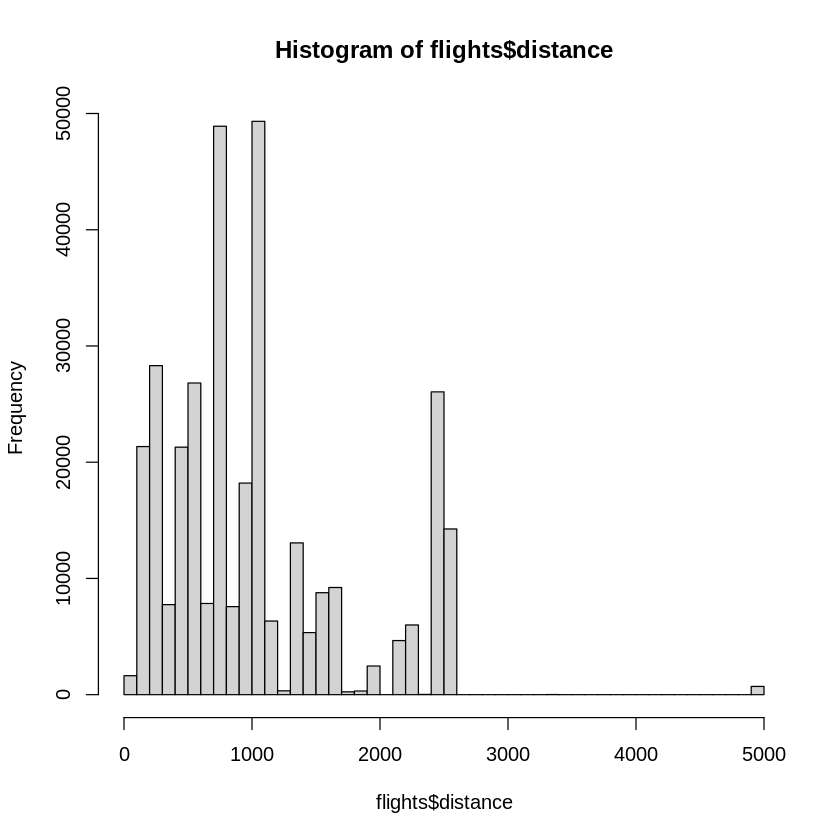

In [ ]:
hist(flights$distance, breaks = 50)

In [ ]:
flights %>%
  mutate(distance_bin = cut(
    distance,
    breaks = seq(0, 5000, by = 500),
    labels = c("1-500", "501-1000", "1001-1500", "1501-2000", "2001-2500", "2501-3000", "3001-3500", "3501-4000", "4001-4500", "4501-5000"))) %>%
  group_by(distance_bin) %>%
  summarize(mean_dep_delay = mean(dep_delay, na.rm = TRUE),
            mean_arr_delay = mean(arr_delay, na.rm = TRUE))

distance_bin,mean_dep_delay,mean_arr_delay
<fct>,<dbl>,<dbl>
1-500,13.397499,9.2594204
501-1000,13.605013,9.1009649
1001-1500,11.753673,5.6152642
1501-2000,12.409002,5.1634893
2001-2500,10.085324,0.7548171
2501-3000,12.928839,2.8886602
3001-3500,12.875000,-2.5000000
4501-5000,9.289362,-1.3651926


# 3. How do departure delays vary by time of day and day of week?

necessary: year, month, day, sched_dep_time, dep_delay

In [ ]:
flights %>%
  mutate(date = make_date(year, month, day),
         day_of_week = wday(date, label = TRUE),
         sched_dep_time_bin = cut(
          sched_dep_time,
          breaks = seq(0, 2400, by = 100),
          labels = seq(0, 23))
         ) %>%
  group_by(day_of_week, sched_dep_time_bin) %>%
  summarize(mean_dep_delay = mean(dep_delay, na.rm = TRUE))

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


day_of_week,sched_dep_time_bin,mean_dep_delay
<ord>,<fct>,<dbl>
Sun,4,-1.7812500
Sun,5,0.8854415
Sun,6,1.8263525
Sun,7,1.1397459
Sun,8,2.6745830
Sun,9,2.5930511
Sun,10,3.6266907
Sun,11,3.8380165
Sun,12,6.3654947


# 4. Which destination are most popular from each New York airport, and how have these changed over time?

necessary: dest, origin, month

In [ ]:
max_dest_df <- flights %>%
  group_by(origin, dest) %>%
  summarize(count = n()) %>%
  group_by(origin) %>%
  filter(count == max(count))

max_dest_df

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


origin,dest,count
<chr>,<chr>,<int>
EWR,ORD,6100
JFK,LAX,11262
LGA,ATL,10263


In [ ]:
unique(flights$origin)

[1] "EWR" "LGA" "JFK"

In [ ]:
flights %>%
  inner_join(max_dest_df, by = c("origin", "dest")) %>%
  group_by(origin, dest, month) %>%
  summarize(flight_count = n())

`summarise()` has grouped output by 'origin', 'dest'. You can override using
the `.groups` argument.


origin,dest,month,flight_count
<chr>,<chr>,<int>,<int>
EWR,ORD,1,502
EWR,ORD,2,475
EWR,ORD,3,493
EWR,ORD,4,491
EWR,ORD,5,549
EWR,ORD,6,551
EWR,ORD,7,564
EWR,ORD,8,582
EWR,ORD,9,579


# 5. What is the relationship between air time and distance for different carriers?

necessary: air_time, distance, carrier

In [ ]:
flights %>%
  group_by(carrier) %>%
  summarize(mean_air_time = mean(air_time, na.rm =TRUE),
            mean_distance = mean(distance, na.rm = TRUE))

carrier,mean_air_time,mean_distance
<chr>,<dbl>,<dbl>
9E,86.78160,530.2358
AA,188.82230,1340.2360
AS,325.61777,2402.0000
B6,151.17717,1068.6215
DL,173.68880,1236.9012
EV,90.07619,562.9917
F9,229.59912,1620.0000
FL,101.14394,664.8294
HA,623.08772,4983.0000
